# Digit Classification using Neural Network

MNIST is a dataset of handwriting digits and we are going to be building a neural network from scratch that can classify these images. 

Each image has 28x28=784 pixels. Each pixel is between 0 (white) to 255 (black)

## Two-layer Neural Network

We will start by building a 2 layer neural network then slowly work our way to build more layers

In [44]:
# First import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# import the dataset
digit=pd.read_csv('train.csv')

# Get the preview
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digit.shape

(42000, 785)

In [4]:
# Change to numpy array
digit=np.array(digit)
m,n = digit.shape # m is the number of rows, n is the number of columns
np.random.shuffle(digit)

# Split into training and testing dataset, 
# Transpose the matrix such that each column is one example, and can be supplied to the input layer
digit_test=digit[0:1000].T
y_test=digit_test[0] # Labels are now in the first row
x_test=digit_test[1:n] # Pixel 1 to 784 are from the second row onwards
x_test=x_test/255. # Standardise the dataset

digit_train=digit[1000:m].T
y_train=digit_train[0]
x_train=digit_train[1:n]
x_train=x_train/255. # Performs normalization to scale pixel values to the range of 0 to 1
_,m_train=x_train.shape

In [5]:
# View shape of first column
x_train[:,0].shape

(784,)

In [6]:
# Function to define the weights and bias
def init_params():
    W1=np.random.rand(10,784)-0.5 # Generates a 10x784 array of random numbers between -0.5 and 0.5
    b1=np.random.rand(10,1)-0.5 
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

# Define Rectified Linear Unit
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1 # Value for first layer
    A1=ReLU(Z1) # Activation function for first layer
    
    Z2=W2.dot(A1)+b2 # Value for second layer
    A2=softmax(Z2) # Activation function for second layer

    return Z1,A1,Z2,A2

# Convert output values as a single-column matrix with 10 rows, each corresponding to the possible digits 0-9
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1 # Match where the 1s are at
    one_hot_Y=one_hot_Y.T # Transpose to get each column as an example
    return one_hot_Y

# Derivative of ReLU function
def deriv_ReLU(Z):
    return Z > 0

# Backpropagation to compute gradients of loss with respect to the weights and biases 
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=1 / m * dZ2.dot(A1.T) # Divide by m to find the average
    db2=1 / m * np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1=1 / m * dZ1.dot(X.T)
    db1=1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Use gradient descent to optimise the values of weights and biases to improve predictions
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha): # alpha is user-defined learning rate
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2
    

In [26]:
def get_predictions(A2):
    return np.argmax(A2,0) # Finds the class with the highest number

def get_accuracy(predictions, Y):
    return np.sum(predictions==Y)/Y.size

# Find the derivative and slowly move towards the point of minimum gradient which means cost is a minimum
def gradient_descent(X,Y, iterations,alpha):
    W1,b1,W2,b2=init_params()
    accuracy=[]
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        accuracy.append(get_accuracy(get_predictions(A2), Y))
        if i%10 ==0: # Print accuracy for every 10 iterations
            print("Iteration: ", i)
            print("Accuracy: ", accuracy[-1])
    predictions=get_predictions(A2)
    return W1,b1,W2,b2,accuracy, predictions

In [27]:
W1,b1,W2,b2,accuracy,predictions=gradient_descent(x_train,y_train,500,0.1)

Iteration:  0
Accuracy:  0.09907317073170732
Iteration:  10
Accuracy:  0.1662439024390244
Iteration:  20
Accuracy:  0.23429268292682928
Iteration:  30
Accuracy:  0.3008048780487805
Iteration:  40
Accuracy:  0.3521951219512195
Iteration:  50
Accuracy:  0.4002439024390244
Iteration:  60
Accuracy:  0.44539024390243903
Iteration:  70
Accuracy:  0.48360975609756096
Iteration:  80
Accuracy:  0.5159024390243903
Iteration:  90
Accuracy:  0.5479268292682927
Iteration:  100
Accuracy:  0.5817560975609756
Iteration:  110
Accuracy:  0.6119756097560975
Iteration:  120
Accuracy:  0.6367804878048781
Iteration:  130
Accuracy:  0.6571463414634147
Iteration:  140
Accuracy:  0.6721463414634147
Iteration:  150
Accuracy:  0.6848536585365854
Iteration:  160
Accuracy:  0.6965853658536585
Iteration:  170
Accuracy:  0.7067073170731707
Iteration:  180
Accuracy:  0.7160731707317073
Iteration:  190
Accuracy:  0.7251219512195122
Iteration:  200
Accuracy:  0.7325853658536585
Iteration:  210
Accuracy:  0.740341463414

Accuracy on Training Set:  0.8367073170731707


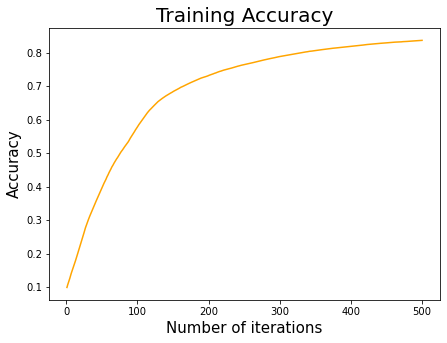

In [65]:
# Plot accuracy graph
def plot_accuracy(accuracy, iterations):
    plt.figure(figsize=(7,5))
    xaxis=[i+1 for i in range(iterations)] 
    sb.lineplot(x=xaxis,y=accuracy, color="orange")
    plt.xlabel('Number of iterations', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.title('Training Accuracy', fontsize=20)
    plt.show

print("Accuracy on Training Set: ", accuracy[-1])
plot_accuracy(accuracy, 500)

In [33]:
# Get classification report
def get_classification(Y, predictions):
    class_labels=[str(i) for i in range(10)]
    report = classification_report(Y, predictions,target_names=class_labels)
    print(report)
    
get_classification(y_train,predictions)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4046
           1       0.92      0.96      0.93      4565
           2       0.85      0.83      0.84      4089
           3       0.83      0.83      0.83      4240
           4       0.82      0.83      0.82      3976
           5       0.80      0.69      0.74      3709
           6       0.88      0.88      0.88      4042
           7       0.87      0.86      0.86      4293
           8       0.71      0.77      0.74      3949
           9       0.76      0.76      0.76      4091

    accuracy                           0.84     41000
   macro avg       0.84      0.83      0.83     41000
weighted avg       0.84      0.84      0.84     41000



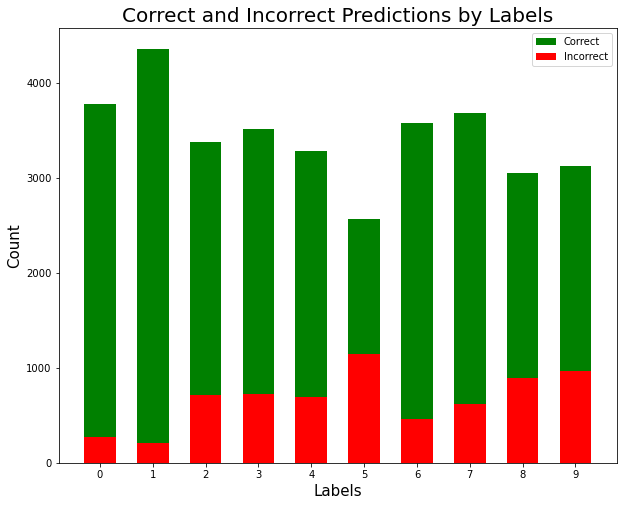

In [43]:
# Bar plot to illustrate the results
def plot_bar(Y, predictions):
    color_map={True:'green', False:'red'}
    
    # Keep track of correct and incorrect predictions
    correct_counts=np.zeros(10)
    incorrect_counts=np.zeros(10)
    for actual,predicted in zip(Y, predictions):
        if actual==predicted:
            correct_counts[actual]+=1
        else:
            incorrect_counts[actual]+=1
    categories=[i for i in range(10)]
    width=0.60
    fig,ax=plt.subplots(figsize=(10,8))
    rect1=ax.bar(categories, correct_counts,width, color=color_map[True], label='Correct')
    rect2=ax.bar(categories, incorrect_counts,width, color=color_map[False], label='Incorrect')
    
    # Set labels and title
    ax.set_xlabel('Labels',fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title('Correct and Incorrect Predictions by Labels', fontsize=20)
    ax.set_xticks(categories)
    ax.set_xticklabels(categories)
    ax.legend()
    
    plt.show()

plot_bar(y_train, predictions)

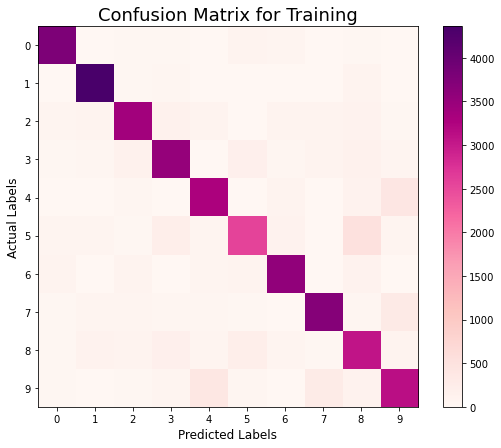

In [55]:
# Plot confusion matrix because it's cool :)
def plot_confusion(Y, predictions):
    labels=[i for i in range(10)]
    cm=confusion_matrix(Y, predictions)
    plt.figure(figsize=(9,7))
    plt.imshow(cm, cmap='RdPu')
    plt.colorbar()
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('Actual Labels', fontsize=12)
    plt.title('Confusion Matrix for Training', fontsize=18)
    
    # Show all ticks and label them
    ticks=np.arange(10)
    plt.xticks(ticks)
    plt.yticks(ticks)
                    
    plt.show()
                    
plot_confusion(y_train,predictions)

In [60]:
# Functions to make predictions
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    return predictions

# Predict on test set
def test_prediction(index, W1,b1,W2,b2):
    current_image=x_train[:,index,None]
    prediction=make_predictions(x_train[:,index,None],W1,b1,W2,b2)
    label=y_train[index]
    print('Index: ', index)
    print("Model prediction: ", prediction)
    print("Actual Label: ", label)
    
    # Display the image
    current_image=current_image.reshape((28,28))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()  

Index:  0
Model prediction:  [2]
Actual Label:  2


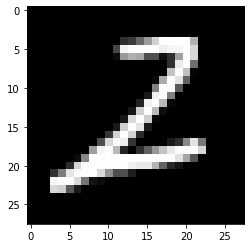

Index:  1534
Model prediction:  [7]
Actual Label:  7


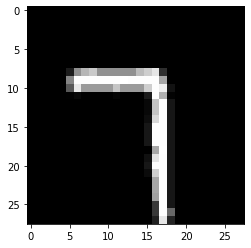

In [62]:
# Test on a couple of examples
test_prediction(0,W1,b1,W2,b2)
test_prediction(1534,W1,b1,W2,b2)

In [64]:
# Find accuracy of the test set
y_pred=make_predictions(x_test,W1,b1,W2,b2)
print("Accuracy on Test Set: " ,get_accuracy(y_pred, y_test))

Accuracy on Test Set:  0.841


In [87]:
# Now let's try with the new unseen data
def kaggle_test(W1,b1,W2,b2):
    testset=pd.read_csv('test.csv')
    # Transpose the matrix such that each column is one image, and can be supplied to the input layer
    testset_x=testset.T/255. # Normalize the dataset

    # Get accuracy of model's predictions on new, unseen data
    testset_pred=make_predictions(testset_x,W1,b1,W2,b2)
    
    # Create dataframe for submission on Kaggle
    imageid=[i+1 for i in range(28000)]
    data={'ImageId': imageid, 
          'Label': testset_pred.tolist()}
    final=pd.DataFrame(data)
    final.to_csv('submission.csv', index=False)
    
kaggle_test(W1,b1,W2,b2)

**Accuracy : 0.8371\
Not bad for a simple neural network! Now let's include more layers and try to make the model better!**

## Three-layer Neural Network

Let's add another hidden layer which can increase the model's capacity to learn complex patterns and relationships. Deeper networks can generalize better to unseen data.